In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Project introduction

## **The Intensity of Forest Fires Throughout the Year**


**Project Objectives:**
- Finding the relation between weather conditions and the area of the forest that was burned
- Finding the relationship between the FWI, the area burned, and the month of the year
- Understanding the relationship between weather conditions, the area burned and the month of the year
- Ranking the intensity of a forest fire based on the FWI and the area burned
- Analyzing the area of a forest burned and the intensity of a forest fire

**Expected Output:**
- Finding out which month of the year produces the most intense forest fires
- Showing the relation between natural occurrences, the FWI, and the intensity of a fire
- Forecasting when a forest fire would occur based on certain weather conditions
- Show prediction on weather conditions that would result in a high FWI
- Provide information on the amount of forest that is burned due to the intensity of the fire.

# Getting the Data

Data of Forest Fires was collected from https://archive.ics.uci.edu/ml/datasets/Forest+Fires

Data information:
1. Coordinate information
- X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
-  Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
2. Time information
- month - month of the year: 'jan' to 'dec'
- day - day of the week: 'mon' to 'sun'
3. FWI: Forest Fire Weather Index system information
- FFMC - 1-2cm deep, 16 hour timelag, moisture content of litter (twigs, leaves, etc)
- DMC - 5-10cm deep, 12 day timelag, moisture content of decomposed organic material underneath litter
- DC - 10-20cm deep, 52 days timelag, dryness of soil
- ISI - how fast a fire spreads, FFMC + wind
4. Enviromental information
- temp - temperature in Celsius degrees: 2.2 to 33.30
- RH - relative humidity in %: 15.0 to 100
- wind - wind speed in km/h: 0.40 to 9.40
- rain - outside rain in mm/m2 : 0.0 to 6.4
5. Area
- area - the burned area of the forest (in ha): 0.00 to 1090.84

## Importing data

In [47]:
df_original = pd.read_csv('forestfires.csv')
df_original.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [48]:
df_original.shape

(517, 13)

In [49]:
df_original.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [50]:
df_original.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

## Cleaning the data

In [51]:
# drop duplicates

df = df_original.drop_duplicates()
df.reset_index(drop=True, inplace=True)
df # 4 duplicates are dropped

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
509,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
510,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
511,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [52]:
# drop null values
df.dropna()
df.reset_index(drop=True, inplace=True)
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
509,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
510,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
511,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Exploratory Data Analysis

In [53]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,90.637427,110.989279,549.155166,9.023587,18.887524,44.348928,4.010526,0.021832,12.891598
std,2.320059,1.230925,5.540920,64.191013,247.724594,4.575543,5.828128,16.358803,1.796613,0.297107,63.892586
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,440.900000,6.400000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.540000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Feature understanding

In [54]:
# styling the plot outputs

sns.set_palette("viridis")
sns.set_style('darkgrid')
colours_list = ["viridis", "rocket", 'mako']

Analysing the environmental conditions and the FWI index for each month.

Months where area burned is not equal to 0 month
aug    99
sep    97
jul    18
mar    18
feb    10
dec     9
jun     8
oct     5
apr     4
may     1
Name: count, dtype: int64


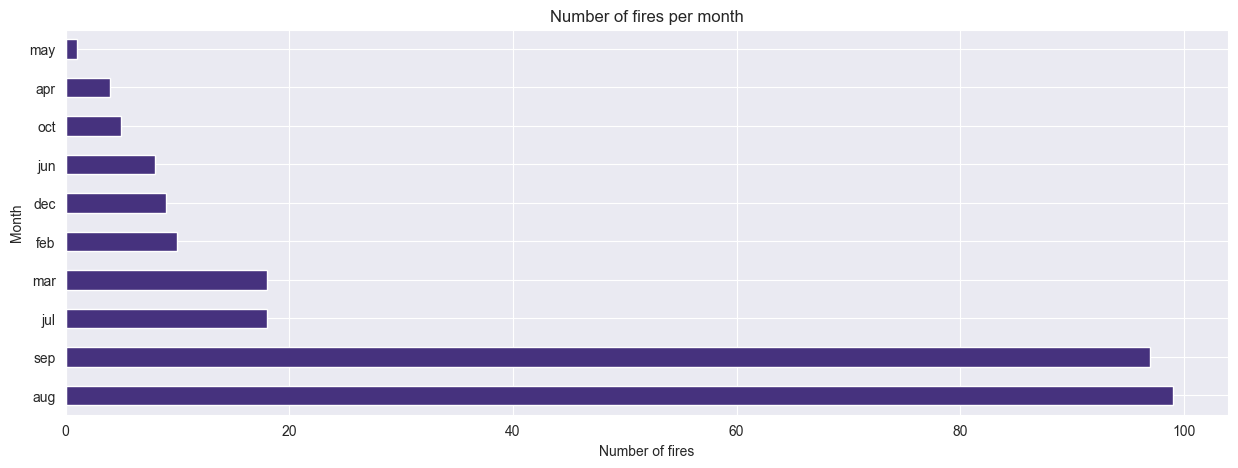

In [55]:
# Amount of fires a month, calculated by counting the amount of rows where 'area' is more than 0

plt.figure(figsize=(15,5))

print('Months where area burned is not equal to 0', df[df['area'] > 0]['month'].value_counts())
ax = df[df['area'] > 0]['month'].value_counts().plot(kind='barh')
ax.set_xlabel('Number of fires')
ax.set_ylabel('Month')
ax.set_title('Number of fires per month')

plt.savefig('FiresperMonth.png')
plt.show()

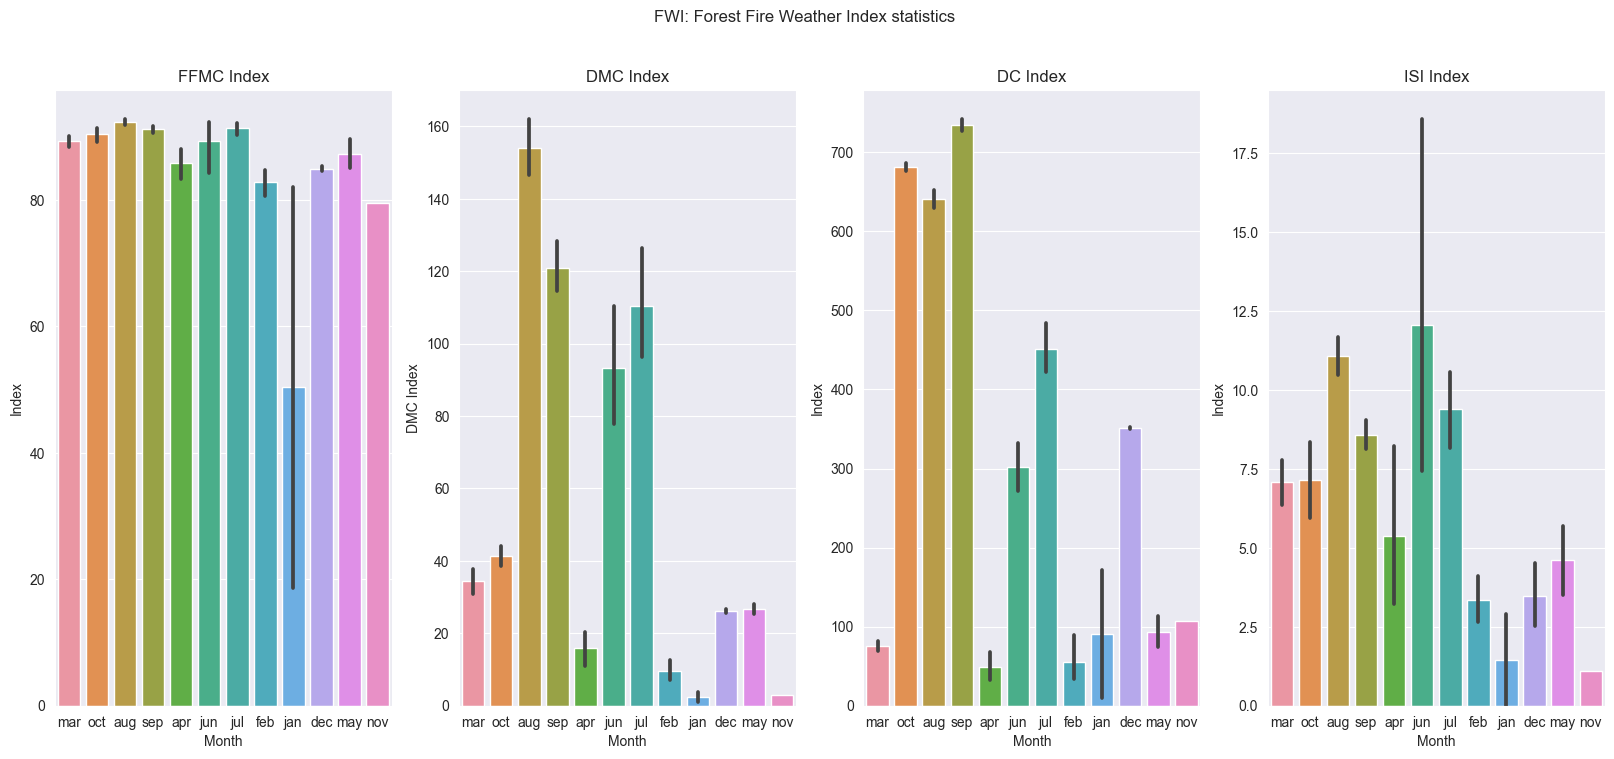

In [56]:
fig, ax = plt.subplots(1,4, figsize=(20,8))
fig.suptitle('FWI: Forest Fire Weather Index statistics')

sns.barplot(x='month', y='FFMC', data=df, ax=ax[0])
sns.barplot(x='month', y='DMC', data=df, ax=ax[1])
sns.barplot(x='month', y='DC', data=df, ax=ax[2])
sns.barplot(x='month', y='ISI', data=df, ax=ax[3])

# sns.histplot(x='FFMC', data=df, ax=ax[0])
# sns.histplot(x='DMC', data=df, ax=ax[1])
# sns.histplot(x='DC', data=df, ax=ax[2])
# sns.histplot(x='ISI', data=df, ax=ax[3])

ax[0].set_xlabel("Month")
ax[0].set_ylabel("Index")
ax[0].set_title("FFMC Index")

ax[1].set_xlabel("Month")
ax[1].set_ylabel("DMC Index")
ax[1].set_title("DMC Index")

ax[2].set_xlabel("Month")
ax[2].set_ylabel("Index")
ax[2].set_title("DC Index")

ax[3].set_xlabel("Month")
ax[3].set_ylabel("Index")
ax[3].set_title("ISI Index")

plt.savefig('FWIIndexStats.png')
plt.show()

Text(0.5, 1.0, 'Log area burnt')

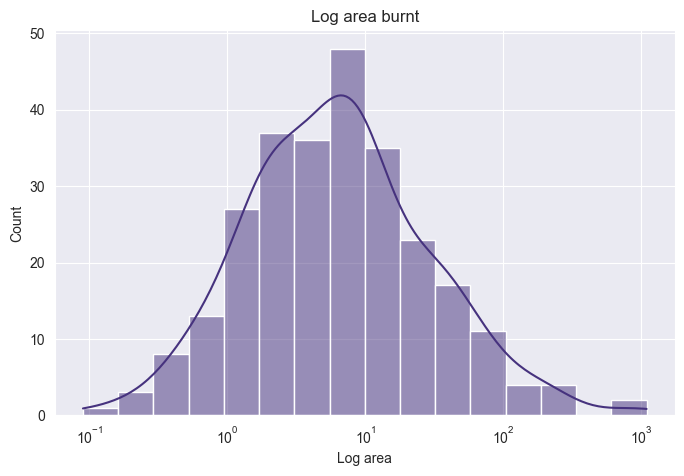

In [57]:
plt.figure(figsize=(8,5))

area_burnt = df[df.area != 0].copy()
ax = sns.histplot(area_burnt['area'], log_scale=True, kde=True)
ax.set_xlabel('Log area')
ax.set_title('Log area burnt')

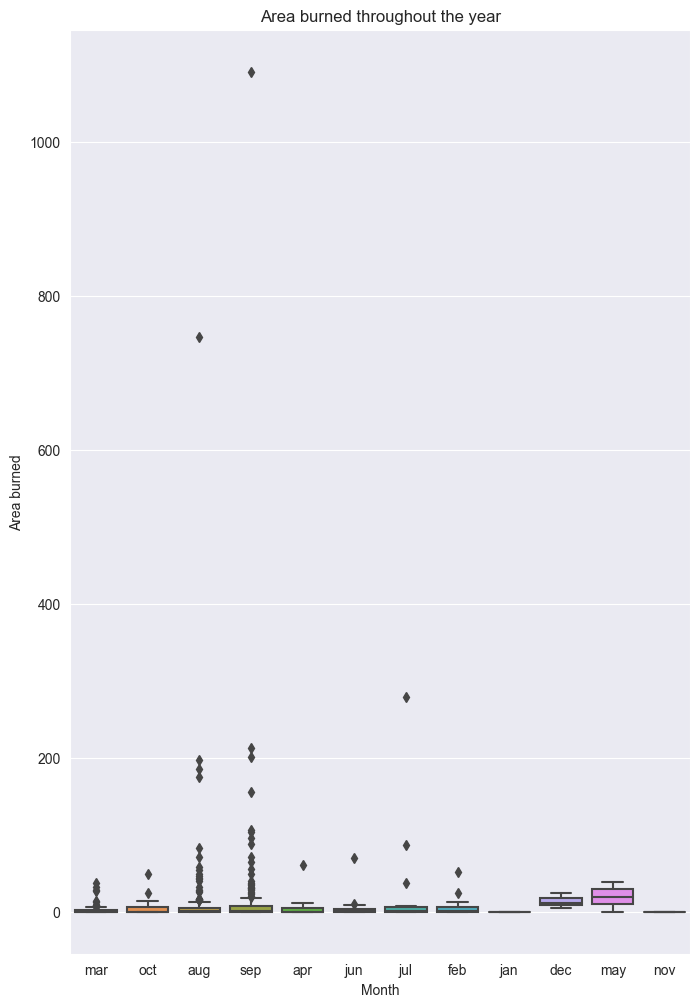

In [58]:
plt.figure(figsize=(8,12))
ax = sns.boxplot(data=df, x='month', y='area')
ax.set_xlabel('Month')
ax.set_ylabel('Area burned')
ax.set_title('Area burned throughout the year')

plt.savefig('AreaBurnedYear.png')
plt.show()

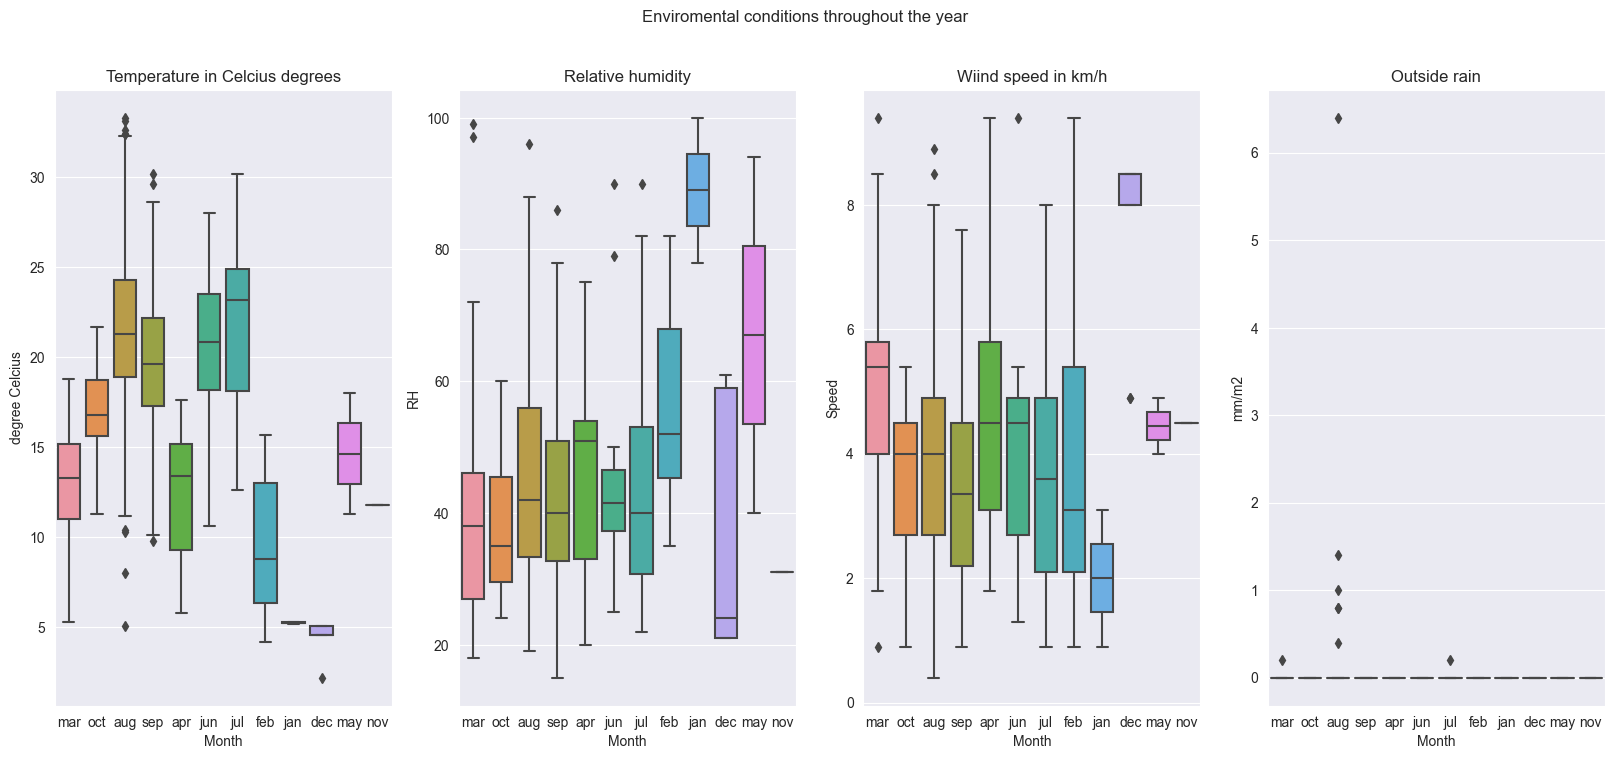

In [59]:
fig, ax = plt.subplots(1,4, figsize=(20,8))
fig.suptitle('Enviromental conditions throughout the year')

sns.boxplot(x='month', y='temp', data=df, ax=ax[0])
sns.boxplot(x='month', y='RH', data=df, ax=ax[1])
sns.boxplot(x='month', y='wind', data=df, ax=ax[2])
sns.boxplot(x='month', y='rain', data=df, ax=ax[3])

ax[0].set_xlabel("Month")
ax[0].set_ylabel("degree Celcius")
ax[0].set_title("Temperature in Celcius degrees")

ax[1].set_xlabel("Month")
ax[1].set_ylabel("RH")
ax[1].set_title("Relative humidity")

ax[2].set_xlabel("Month")
ax[2].set_ylabel("Speed")
ax[2].set_title("Wiind speed in km/h")

ax[3].set_xlabel("Month")
ax[3].set_ylabel("mm/m2")
ax[3].set_title("Outside rain")

plt.savefig('EnvFactorsYear.png')
plt.show()

## Feature relationships

In [60]:
df_log = df[df.area != 0].copy()
df_log.reset_index(drop=True, inplace=True)
df_log['logarea'] = np.log(df_log['area'])

df_log.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,logarea
0,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,-1.021651
1,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,-0.843970
2,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,-0.755023
3,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,-0.597837
4,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,-0.494296


In [61]:
df_log.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,logarea
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,4.810409,4.368030,91.031599,115.001115,572.688848,9.182156,19.319703,43.795539,4.110037,0.028996,24.585093,1.839215
std,2.387257,1.172707,3.715710,61.713040,228.449679,4.154226,6.189346,15.073422,1.887471,0.399131,86.662512,1.526762
min,1.000000,2.000000,63.500000,3.200000,15.300000,0.800000,2.200000,15.000000,0.400000,0.000000,0.090000,-2.407946
25%,3.000000,4.000000,90.300000,82.900000,503.600000,6.800000,16.100000,33.000000,2.700000,0.000000,2.140000,0.760806
50%,5.000000,4.000000,91.700000,111.700000,665.600000,8.400000,20.100000,41.000000,4.000000,0.000000,6.360000,1.850028
75%,7.000000,5.000000,93.000000,141.300000,721.400000,11.400000,23.400000,53.000000,4.900000,0.000000,15.340000,2.730464
max,9.000000,9.000000,96.200000,291.300000,860.600000,22.700000,33.300000,96.000000,9.400000,6.400000,1090.840000,6.994703


Analysing the relationship between the FWI, environmental factors, and the area burned

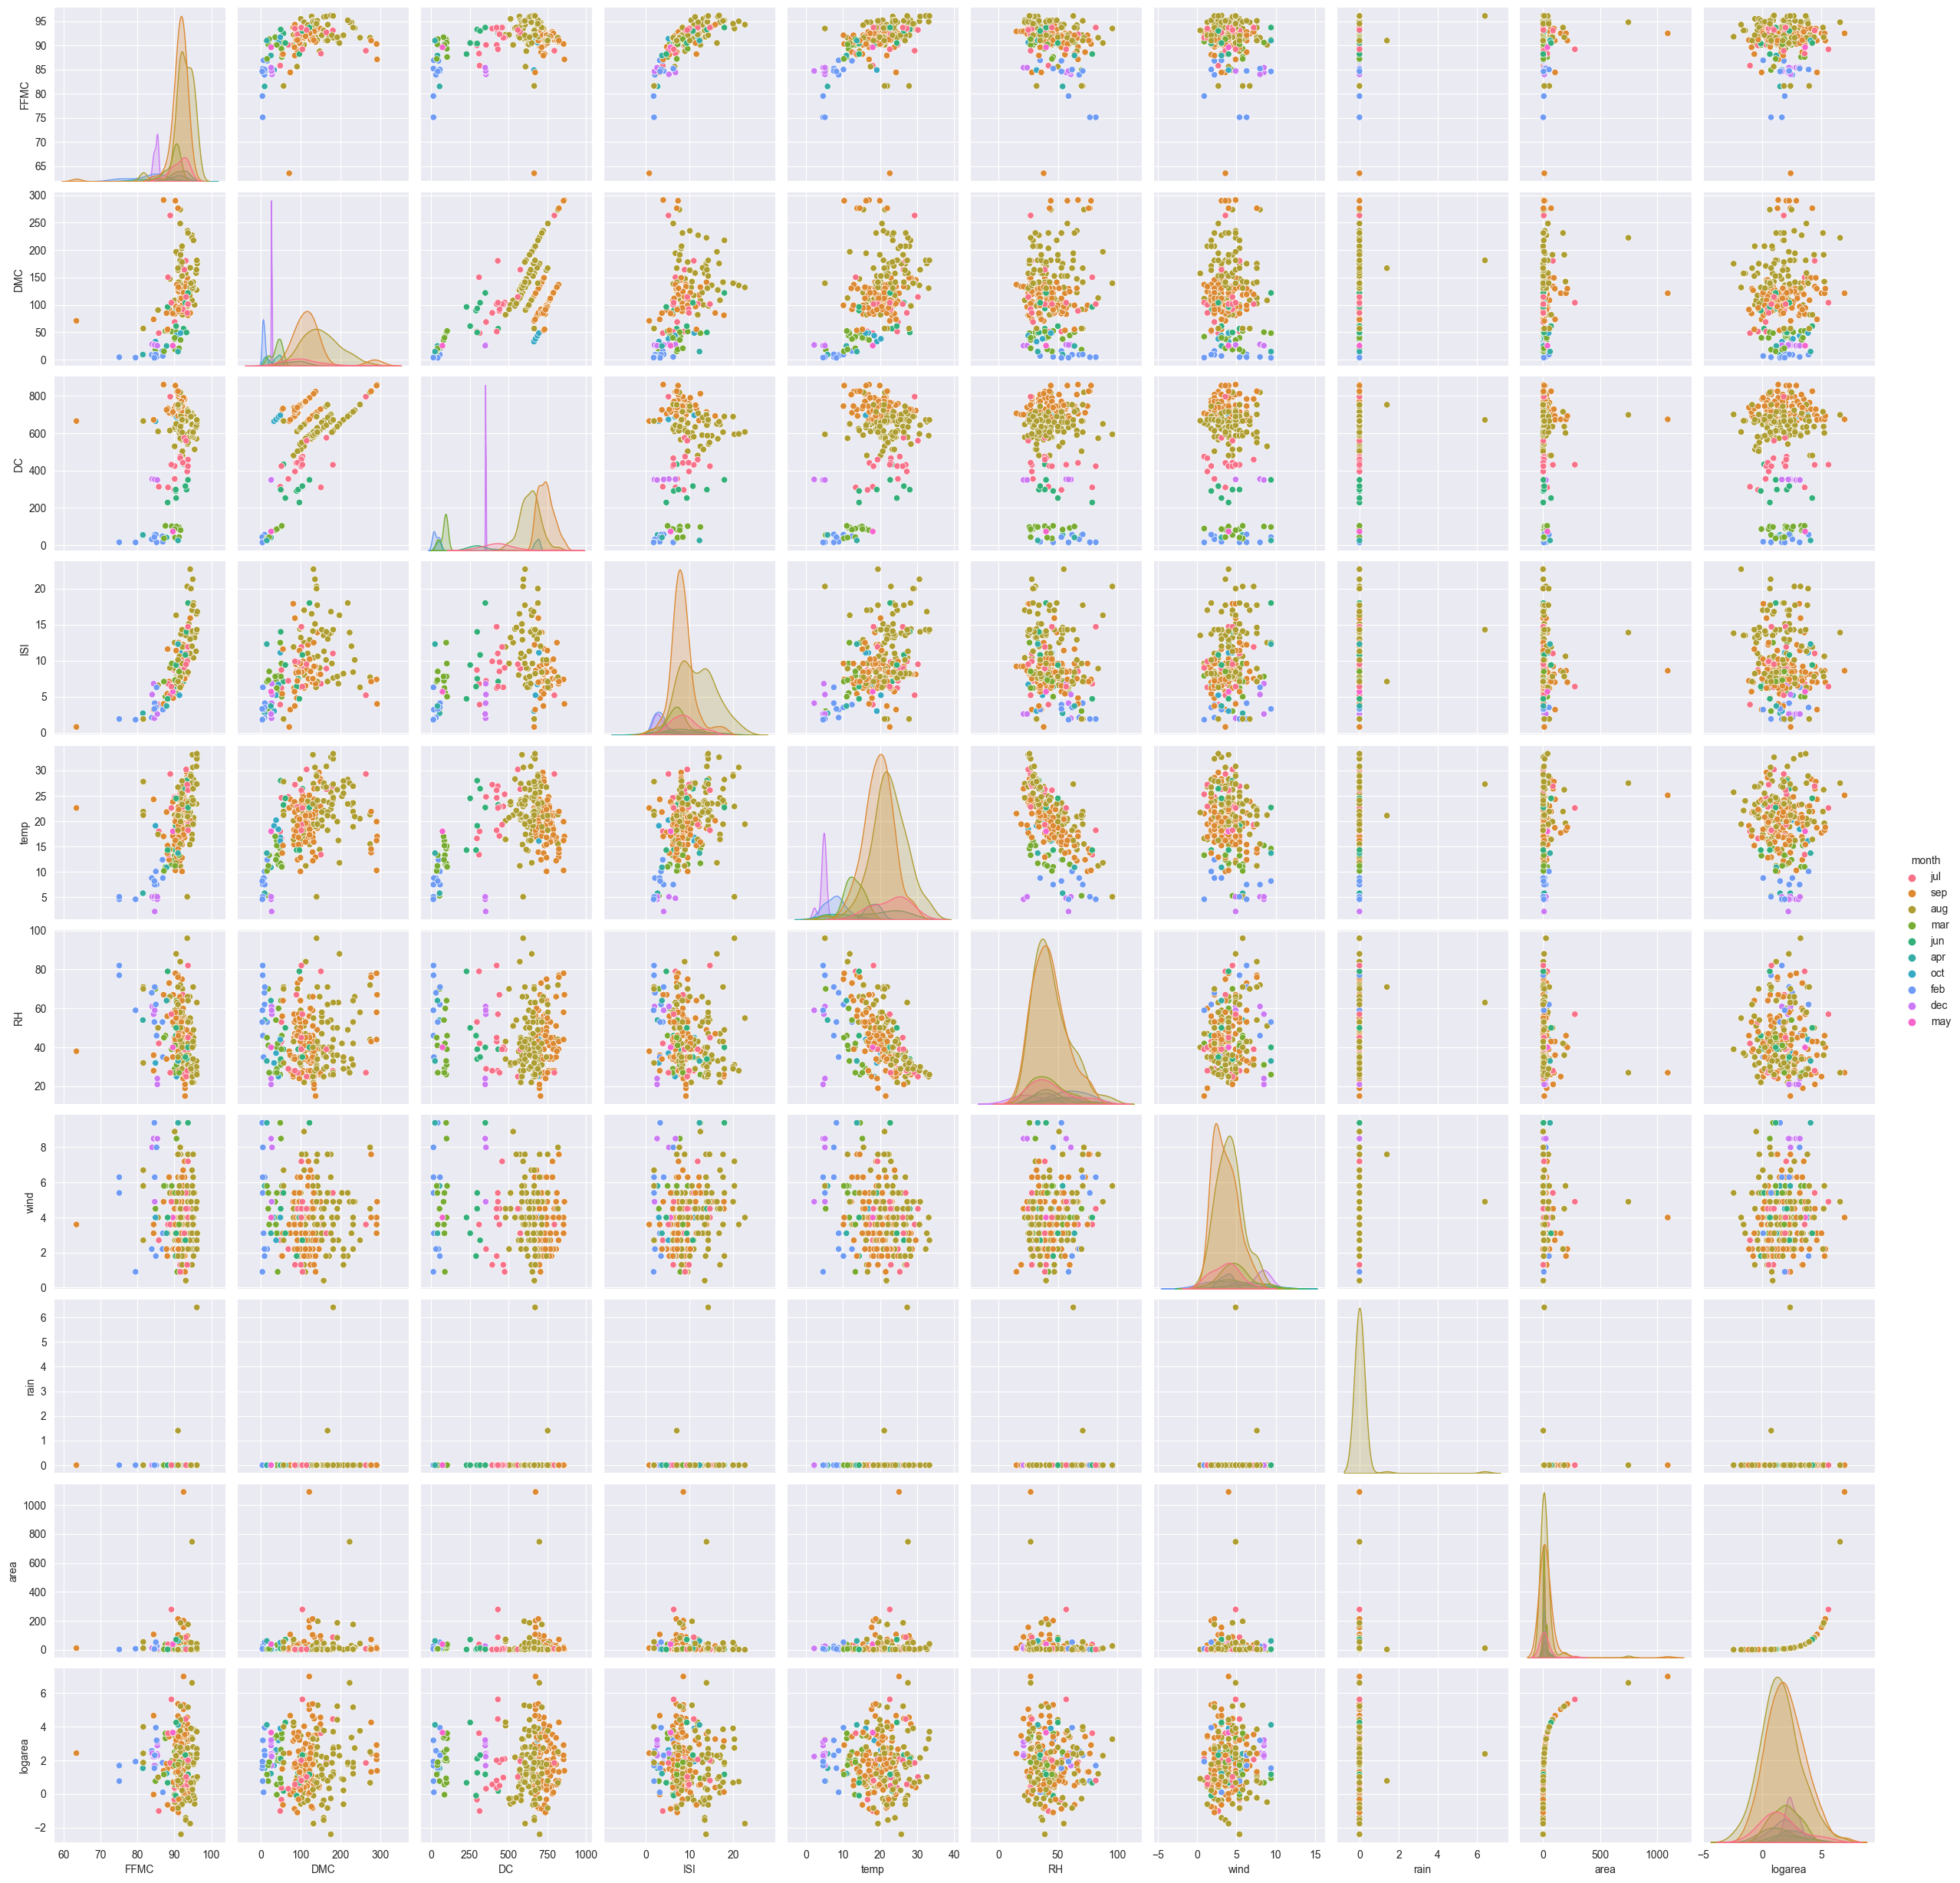

In [62]:
sns.pairplot(df_log, vars = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'logarea'],
             hue = 'month')

plt.savefig('PairPlotFWIEnvArea.png')
plt.show()

In [63]:
df_corr = df_log[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'logarea']].dropna().corr()
df_corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,logarea
FFMC,1.000000,0.482605,0.412601,0.704580,0.562687,-0.285922,-0.161727,0.081502,0.054296,-0.046183
DMC,0.482605,1.000000,0.666455,0.329145,0.501520,0.022695,-0.136367,0.075090,0.089585,0.034370
DC,0.412601,0.666455,1.000000,0.256420,0.497087,-0.092033,-0.236360,0.036108,0.047512,-0.021424
ISI,0.704580,0.329145,0.256420,1.000000,0.465781,-0.150555,0.073208,0.067150,0.002180,-0.109250
temp,0.562687,0.501520,0.497087,0.465781,1.000000,-0.500377,-0.320168,0.080909,0.110388,-0.033190
RH,-0.285922,0.022695,-0.092033,-0.150555,-0.500377,1.000000,0.140588,0.099850,-0.104894,-0.045776
wind,-0.161727,-0.136367,-0.236360,0.073208,-0.320168,0.140588,1.000000,0.049241,0.002013,0.053223
rain,0.081502,0.075090,0.036108,0.067150,0.080909,0.099850,0.049241,1.000000,-0.012889,0.012122
area,0.054296,0.089585,0.047512,0.002180,0.110388,-0.104894,0.002013,-0.012889,1.000000,0.534660
logarea,-0.046183,0.034370,-0.021424,-0.109250,-0.033190,-0.045776,0.053223,0.012122,0.534660,1.000000


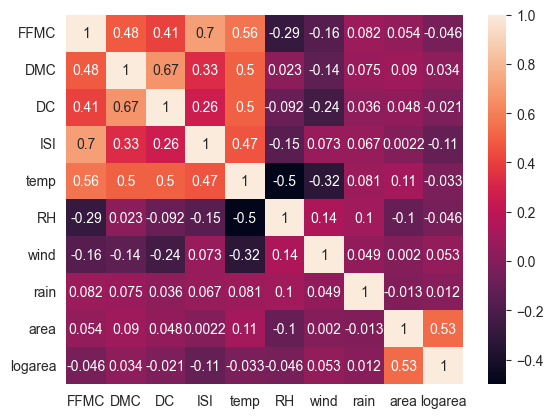

In [64]:
sns.heatmap(df_corr, annot=True)

plt.savefig('HeatmapFWIEnvArea.png')
plt.show()

Observing the relationship between forest fire counts within a month and the enviromental conditions and FWI index

C:\Users\Anis\AppData\Local\Temp\ipykernel_7548\2516043472.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(month_order, rotation=45)
C:\Users\Anis\AppData\Local\Temp\ipykernel_7548\2516043472.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(month_order, rotation=45)


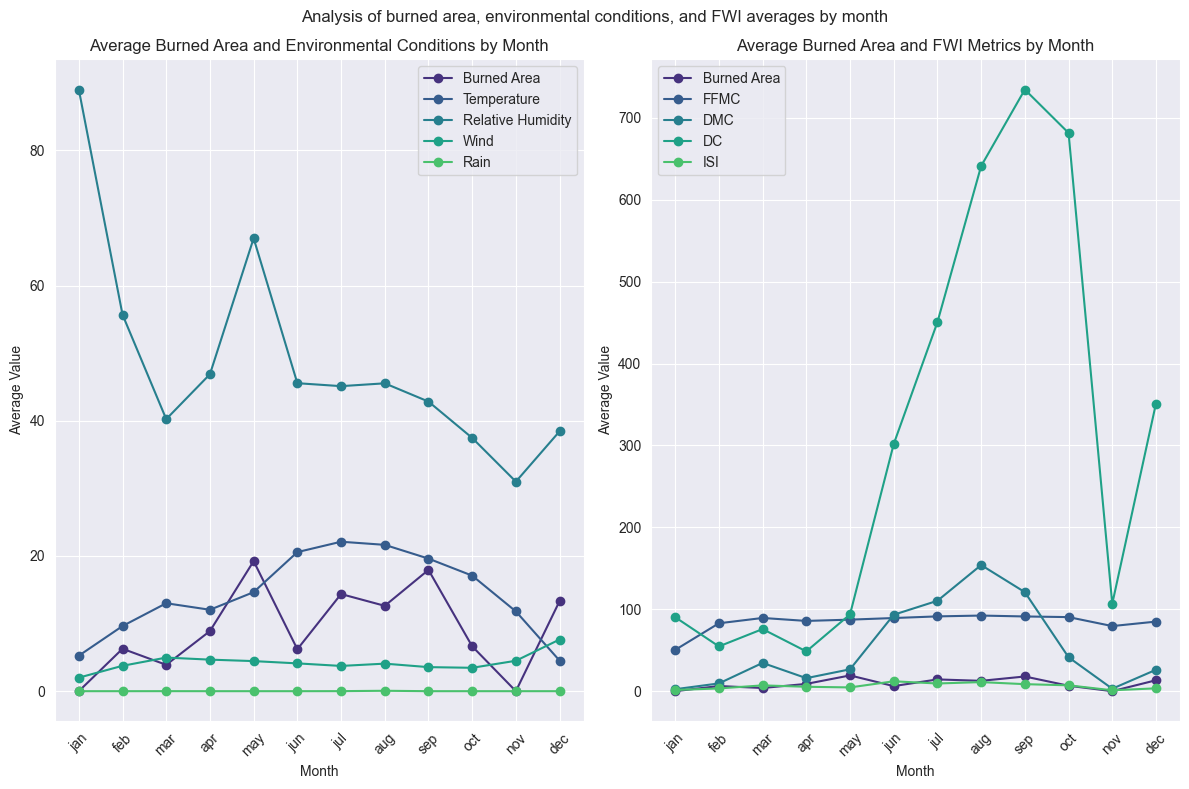

In [65]:
# monthly average analysis

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))
fig.suptitle('Analysis of burned area, environmental conditions, and FWI averages by month')

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_avg = df.copy()

monthly_avg['month'] = pd.Categorical(monthly_avg['month'], categories=month_order, ordered=True)
monthly_avg = monthly_avg.sort_values('month')

# Plot the data
ax1.plot(month_order, monthly_avg.groupby('month')['area'].mean(), marker='o', label='Burned Area')
ax1.plot(month_order, monthly_avg.groupby('month')['temp'].mean(), marker='o', label='Temperature')
ax1.plot(month_order, monthly_avg.groupby('month')['RH'].mean(), marker='o', label='Relative Humidity')
ax1.plot(month_order, monthly_avg.groupby('month')['wind'].mean(), marker='o', label='Wind')
ax1.plot(month_order, monthly_avg.groupby('month')['rain'].mean(), marker='o', label='Rain')

ax1.set_xlabel('Month')
ax1.set_ylabel('Average Value')
ax1.set_title('Average Burned Area and Environmental Conditions by Month')
ax1.legend()
ax1.set_xticklabels(month_order, rotation=45)

ax2.plot(month_order, monthly_avg.groupby('month')['area'].mean(), marker='o', label='Burned Area')
ax2.plot(month_order, monthly_avg.groupby('month')['FFMC'].mean(), marker='o', label='FFMC')
ax2.plot(month_order, monthly_avg.groupby('month')['DMC'].mean(), marker='o', label='DMC')
ax2.plot(month_order, monthly_avg.groupby('month')['DC'].mean(), marker='o', label='DC')
ax2.plot(month_order, monthly_avg.groupby('month')['ISI'].mean(), marker='o', label='ISI')

ax2.set_xlabel('Month')
ax2.set_ylabel('Average Value')
ax2.set_title('Average Burned Area and FWI Metrics by Month')
ax2.legend()
ax2.set_xticklabels(month_order, rotation=45)

fig.tight_layout()

plt.savefig('AnalysisEnvFWIAreabyMonth.png')
plt.show()

Based on enviromental factors alone, there are peaks in the data during February, May, September, and December. May has the highest peak, showing an upward trend for relative humidity during that month as well. After May, temperature shows a steady increase before declining during August. Wind shws an increase in March and November, during months where burned area is lower.
For the case of FWI metrics, there's a massive increase that starts from June until October, peaking in September. During this period, the only significant spike in burned area is during Septmeber. DMC shows an increase during March and June, peaking in August. Massive peaks in DMC shows a slight decrease in burned area.

### Grading forest fire intensity by the FWI

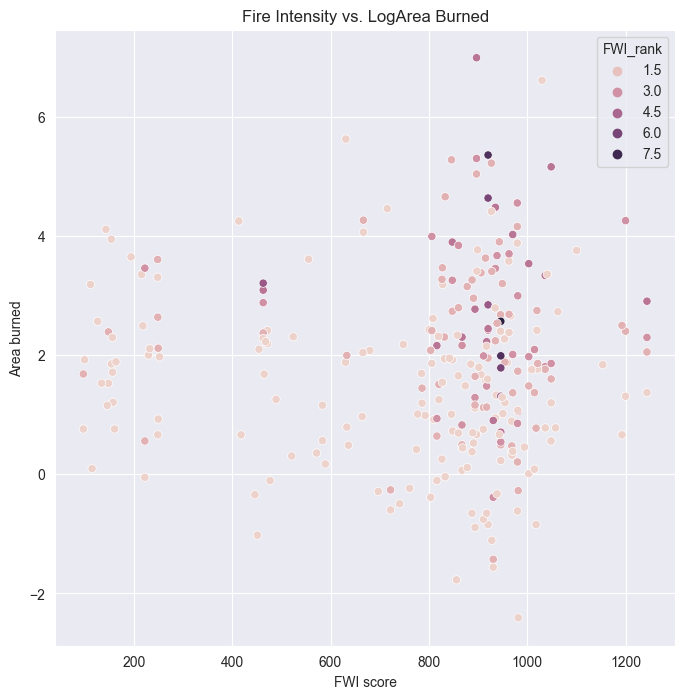

Analysis of fire intensity, their FWI scoring, and the area burned
Rank 1.0: Min FWI = 97.600	Max FWI = 1243.000	Mean FWI = 724.095	Min Area = 0.090	Max Area = 746.280	Mean Area = 15.699	Fire counts = 154.0
Rank 2.0: Min FWI = 97.600	Max FWI = 1243.000	Mean FWI = 842.889	Min Area = 0.240	Max Area = 196.480	Mean Area = 22.854	Fire counts = 62.0
Rank 3.0: Min FWI = 222.600	Max FWI = 1243.000	Mean FWI = 911.572	Min Area = 0.680	Max Area = 200.940	Mean Area = 26.492	Fire counts = 29.0
Rank 4.0: Min FWI = 463.100	Max FWI = 1243.000	Mean FWI = 920.831	Min Area = 2.030	Max Area = 1090.840	Mean Area = 101.390	Fire counts = 16.0
Rank 5.0: Min FWI = 463.100	Max FWI = 946.000	Mean FWI = 776.400	Min Area = 3.710	Max Area = 24.770	Mean Area = 15.227	Fire counts = 3.0
Rank 6.0: Min FWI = 920.100	Max FWI = 946.000	Mean FWI = 933.050	Min Area = 5.970	Max Area = 103.390	Mean Area = 54.680	Fire counts = 2.0
Rank 7.0: Min FWI = 920.100	Max FWI = 946.000	Mean FWI = 933.050	Min Area = 7.310	Max Area = 212.

In [66]:
# ranking forest fire intensity by sum based approach
fwi = df_log.copy()

fwi['FWI_score'] = fwi['FFMC'] + fwi['DMC'] + fwi['DC'] + fwi['ISI']
fwi['FWI_rank'] = fwi.groupby('FWI_score')['area'].rank()

plt.figure(figsize=(8, 8))

sns.scatterplot(x='FWI_score', y='logarea', hue='FWI_rank', data=fwi)

plt.xlabel('FWI score')
plt.ylabel('Area burned')
plt.title('Fire Intensity vs. LogArea Burned')

# sns.barplot(x='Rank', y='FWI_score', hue='month', dodge = False, data=fwi)

# plt.xlabel('Intensity rank')
# plt.ylabel('FWI sum')
# plt.title('Ranking of Forest Fire Intensity by Sum Based Approach')

plt.savefig('IntensityRank.png')
plt.show()

print("Analysis of fire intensity, their FWI scoring, and the area burned")
fwi_stats = fwi.groupby('FWI_rank').agg({'FWI_score': ['min', 'max', 'mean'], 'area': ['min', 'max', 'mean', 'count']})

for rank, stats in fwi_stats.iterrows():
    fwi_min = stats[('FWI_score', 'min')]
    fwi_max = stats[('FWI_score', 'max')]
    fwi_mean = stats[('FWI_score', 'mean')]
    area_min = stats[('area', 'min')]
    area_max = stats[('area', 'max')]
    area_mean = stats[('area', 'mean')]
    fwi_count = stats[('area', 'count')]
    
    print(f"Rank {rank:.1f}: Min FWI = {fwi_min:.3f}\tMax FWI = {fwi_max:.3f}\tMean FWI = {fwi_mean:.3f}\t"
          f"Min Area = {area_min:.3f}\tMax Area = {area_max:.3f}\tMean Area = {area_mean:.3f}\tFire counts = {fwi_count}")

From here, we can see that intense fires don't often correlate with a large burned area. The reason for this can be attributed to a fast response from people in ensuring the fire does not spread too far. We can see that having a high FWI score does not equate to a high intensity fire, most likely due to environmental factors that come into play, often they have a score between 800 and 1000.

In [67]:
fwi_corr = fwi[['FWI_score', 'FWI_rank', 'area']].corr()
fwi_corr

,FWI_score,FWI_rank,area
FWI_score,1.000000,0.239889,0.060025
FWI_rank,0.239889,1.000000,0.174746
area,0.060025,0.174746,1.000000


In [68]:
max_rank = fwi.groupby('month')['FWI_rank'].max().reset_index()
print('Maximum intensity ranking recorded for each month:')
print(max_rank)

Maximum intensity ranking recorded for each month:
  month  FWI_rank
0   apr       2.0
1   aug       4.0
2   dec       5.0
3   feb       2.0
4   jul       2.0
5   jun       1.0
6   mar       3.0
7   may       1.0
8   oct       4.0
9   sep       8.0


# Modelling the data

## Data preperation

In [69]:
# getting only the data that will be used
features = ['month', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI_score', 'FWI_rank', 'temp', 'RH', 'wind', 'rain', 'area', 'logarea']
modelling = fwi[features].copy()
modelling

,month,FFMC,DMC,DC,ISI,FWI_score,FWI_rank,temp,RH,wind,rain,area,logarea
0,jul,85.8,48.3,313.4,3.9,451.4,1.0,18.0,42,2.7,0.0,0.36,-1.021651
1,sep,91.0,129.5,692.6,7.0,920.1,1.0,21.7,38,2.2,0.0,0.43,-0.843970
2,sep,90.9,126.5,686.5,7.0,910.9,1.0,21.9,39,1.8,0.0,0.47,-0.755023
3,aug,95.5,99.9,513.3,13.2,721.9,1.0,23.3,31,4.5,0.0,0.55,-0.597837
4,aug,90.1,108.0,529.8,12.5,740.4,1.0,21.2,51,8.9,0.0,0.61,-0.494296
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,aug,91.0,166.9,752.6,7.1,1017.6,2.0,21.1,71,7.6,1.4,2.17,0.774727
265,aug,91.0,166.9,752.6,7.1,1017.6,1.0,18.2,62,5.4,0.0,0.43,-0.843970
266,aug,81.6,56.7,665.6,1.9,805.8,1.0,27.8,32,2.7,0.0,6.44,1.862529
267,aug,81.6,56.7,665.6,1.9,805.8,3.0,21.9,71,5.8,0.0,54.29,3.994340


In [70]:
encoder = LabelEncoder()
fires =  modelling[['FFMC', 'DMC', 'DC', 'ISI',  'FWI_score', 'FWI_rank', 'temp', 'RH', 'wind', 'rain', 'area', 'logarea']].copy()

fires['month_encoded'] = encoder.fit_transform(modelling['month'])

scaler = StandardScaler()
scaled = scaler.fit_transform(fires)

In [71]:
fires

,FFMC,DMC,DC,ISI,FWI_score,FWI_rank,temp,RH,wind,rain,area,logarea,month_encoded
0,85.8,48.3,313.4,3.9,451.4,1.0,18.0,42,2.7,0.0,0.36,-1.021651,4
1,91.0,129.5,692.6,7.0,920.1,1.0,21.7,38,2.2,0.0,0.43,-0.843970,9
2,90.9,126.5,686.5,7.0,910.9,1.0,21.9,39,1.8,0.0,0.47,-0.755023,9
3,95.5,99.9,513.3,13.2,721.9,1.0,23.3,31,4.5,0.0,0.55,-0.597837,1
4,90.1,108.0,529.8,12.5,740.4,1.0,21.2,51,8.9,0.0,0.61,-0.494296,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,91.0,166.9,752.6,7.1,1017.6,2.0,21.1,71,7.6,1.4,2.17,0.774727,1
265,91.0,166.9,752.6,7.1,1017.6,1.0,18.2,62,5.4,0.0,0.43,-0.843970,1
266,81.6,56.7,665.6,1.9,805.8,1.0,27.8,32,2.7,0.0,6.44,1.862529,1
267,81.6,56.7,665.6,1.9,805.8,3.0,21.9,71,5.8,0.0,54.29,3.994340,1


In [72]:
scaled

array([[-1.4105919 , -1.08284151, -1.13710882, ..., -0.28005474,
        -1.87730624, -0.21968038],
       [-0.00851988,  0.23537829,  0.52586924, ..., -0.2792455 ,
        -1.7607115 ,  1.18065188],
       [-0.03548281,  0.18667558,  0.49911775, ..., -0.27878308,
        -1.70234399,  1.18065188],
       ...,
       [-2.54303469, -0.94647394,  0.40746099, ..., -0.20976676,
         0.01529825, -1.05987973],
       [-2.54303469, -0.94647394,  0.40746099, ...,  0.34340425,
         1.4141972 , -1.05987973],
       [-2.54303469, -0.94647394,  0.40746099, ..., -0.15520109,
         0.37608297, -1.05987973]])

## Finding relation between environmental factors and the area burned, and predicting if a fire will start based on environmental factors

In [73]:
env_factors = ['temp', 'RH', 'wind', 'rain']
X = fires[env_factors]
y = fires['logarea']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [74]:
reg = LinearRegression().fit(X_train, y_train)

In [75]:
print('Coefficients (temperature, RH (relative humidity), wind, rain):', reg.coef_)
print('Intercept:', reg.intercept_)
print('Determination coefficient: ', reg.score(X_test, y_test)) # how well the fitting is, 1.0 = good, -1.0 = poor

Coefficients (temperature, RH (relative humidity), wind, rain): [-0.00047973 -0.00387007  0.06134582  0.03911621]
Intercept: 1.8093909454241701
Determination coefficient:  -0.0066469811151801395


In [76]:
y_pred = reg.predict(X_test)
model_mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error:', model_mae)

Mean absolute error: 1.3086223204847365


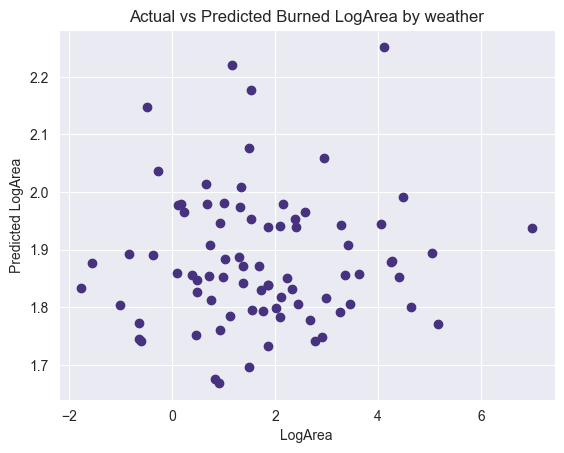

In [77]:
plt.scatter(y_test, y_pred)
plt.xlabel('LogArea')
plt.ylabel('Predicted LogArea')
plt.title('Actual vs Predicted Burned LogArea by weather')

plt.savefig('LMBurnedArea.png')
plt.show()

Weather has a significant role in the probability of a forest fire starting.

### K-Means application

In [78]:
KMEnv = fires[['temp', 'RH', 'wind', 'rain', 'logarea']]
scaler = StandardScaler()
KMEnvScaled = scaler.fit_transform(KMEnv)

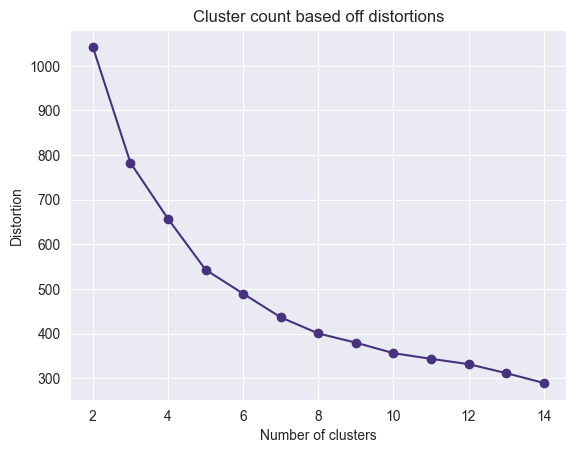

In [79]:
# identifying k value

distortions = []
for i in range(2, 15):
    km = KMeans(
        n_clusters=i, 
        n_init="auto",
        max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(KMEnvScaled)
    distortions.append(km.inertia_)

# plot
plt.plot(range(2, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Cluster count based off distortions')

plt.savefig('KMEnvElbow.png')
plt.show()

In [80]:
k5 = KMeans(n_clusters = 5, random_state=1).fit(KMEnvScaled)
KMEnv['K5'] = k5.labels_

KMEnv

c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Anis\AppData\Local\Temp\ipykernel_7548\3152483582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KMEnv['K5'] = k5.labels_


,temp,RH,wind,rain,logarea,K5
0,18.0,42,2.7,0.0,-1.021651,0
1,21.7,38,2.2,0.0,-0.843970,0
2,21.9,39,1.8,0.0,-0.755023,0
3,23.3,31,4.5,0.0,-0.597837,0
4,21.2,51,8.9,0.0,-0.494296,3
...,...,...,...,...,...,...
264,21.1,71,7.6,1.4,0.774727,1
265,18.2,62,5.4,0.0,-0.843970,1
266,27.8,32,2.7,0.0,1.862529,0
267,21.9,71,5.8,0.0,3.994340,1


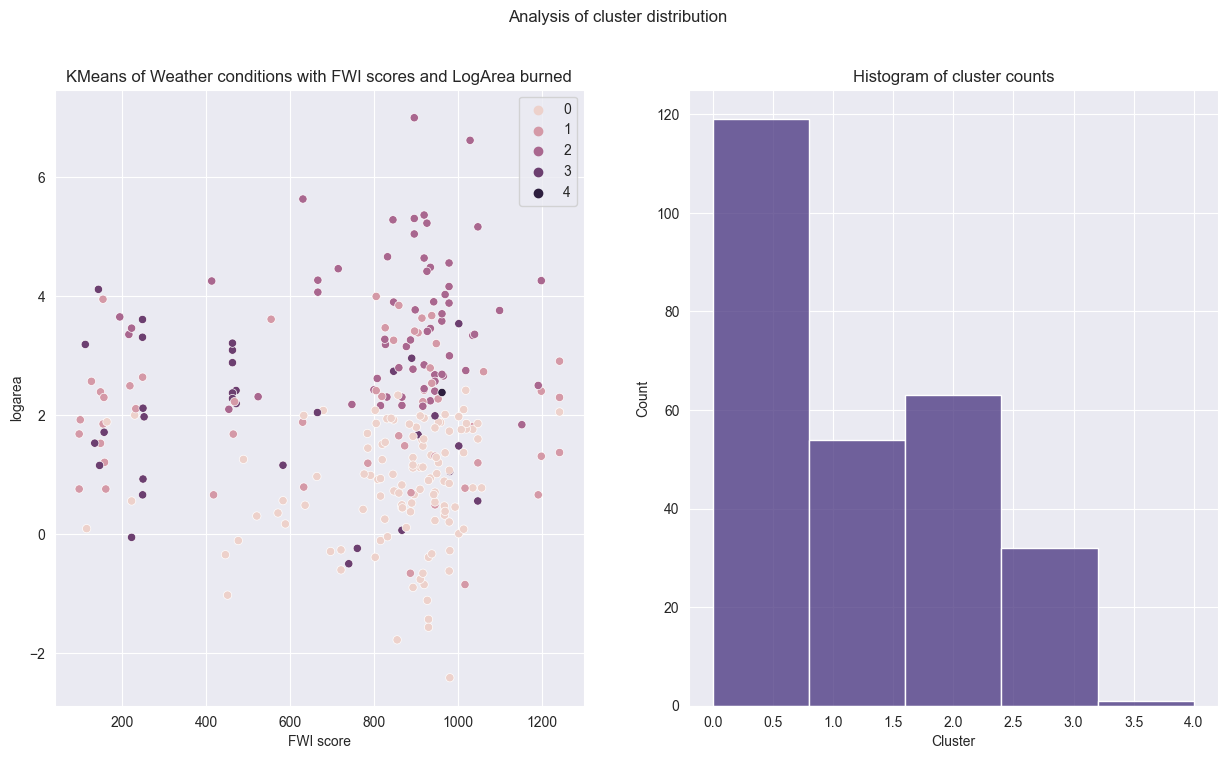

<Figure size 800x800 with 0 Axes>

In [81]:
fig, ax = plt.subplots(1,2, figsize=(15,8))

fig.suptitle('Analysis of cluster distribution')

plt.figure(figsize=(8,8))
sns.scatterplot(x = fwi['FWI_score'], y = fwi['logarea'], hue=KMEnv['K5'], ax=ax[0])
sns.histplot(KMEnv['K5'], bins=5, ax=ax[1])

ax[0].set_xlabel('FWI score')
ax[0].set_ylabel('logarea')
ax[0].set_title('KMeans of Weather conditions with FWI scores and LogArea burned')
ax[0].legend()

ax[1].set_xlabel('Cluster')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of cluster counts')

plt.tight_layout()

fig.savefig('ClusterAnalysis.png')
plt.show()

We can make the following assumptions:
- Clusters 1-2 are of normal weather conditions
- Clusters 3-4 are of moderate weather conditions
- Cluster 5 is of intense weather conditions

Clusters of a more moderate weather condition tend to have a higher FWI score, and a higher area burned, indicting that theses conditions have a higher probability of having a forest fire.

More intense weather conditions can be found having a lower FWI score, and lower area burned.

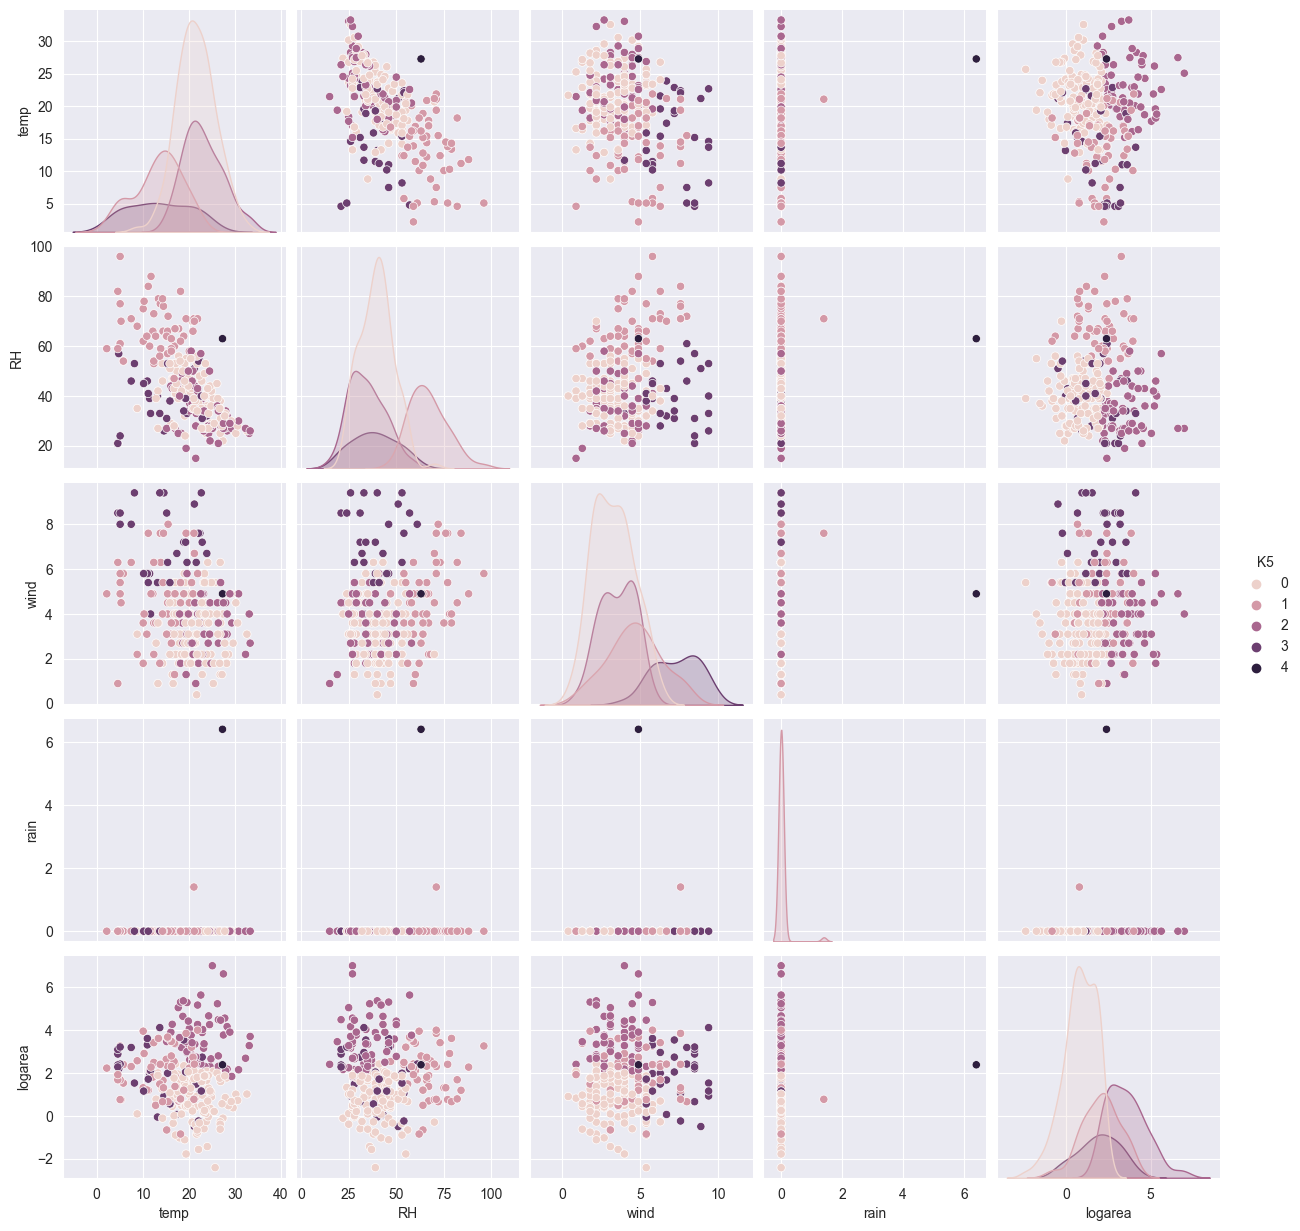

In [82]:
sns.pairplot(KMEnv, vars = ['temp', 'RH', 'wind', 'rain', 'logarea'],
             hue = 'K5')
plt.savefig('PairPlotClusterEnv.png')
plt.show()

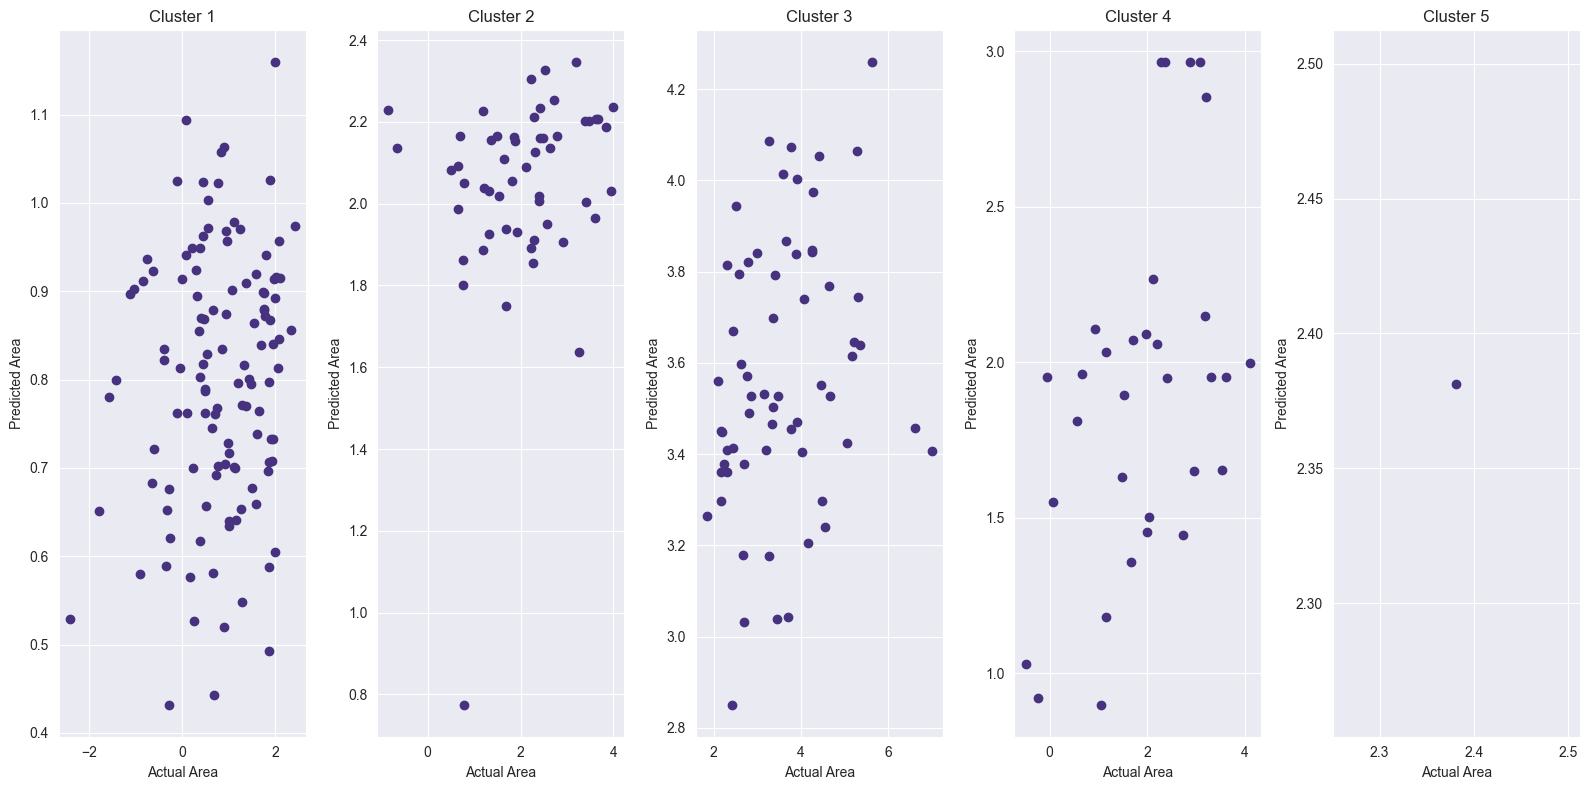

<Figure size 640x480 with 0 Axes>

Cluster 1 Center (temp, RH, wind, rain):
[ 0.3518346  -0.28355069 -0.43397965 -0.072784   -0.68139179]

Cluster 2 Center (temp, RH, wind, rain):
[-0.96091479  1.52260479  0.28366172 -0.00770695  0.13803178]

Cluster 3 Center (temp, RH, wind, rain):
[ 0.60754547 -0.614141   -0.29768726 -0.072784    1.13839521]

Cluster 4 Center (temp, RH, wind, rain):
[-0.92331395 -0.34574     1.70815102 -0.072784    0.0486634 ]

Cluster 5 Center (temp, RH, wind, rain):
[ 1.29176361  1.27643592  0.41930981 15.99195081  0.35578029]



In [83]:
cluster_centers = k5.cluster_centers_

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(16, 8))

for i, center in enumerate(cluster_centers):
    cluster_data = KMEnv[KMEnv['K5'] == i]
    
    X = cluster_data[['temp', 'RH', 'wind', 'rain']]
    y = cluster_data['logarea']
    
    model = LinearRegression()
    model.fit(X, y)
    
    prediction = model.predict(X)
    
    axs[i].scatter(y, prediction)
    axs[i].set_xlabel('Actual Area')
    axs[i].set_ylabel('Predicted Area')
    axs[i].set_title(f'Cluster {i+1}')
    
plt.tight_layout()
plt.show()

plt.savefig('KMeansClusterPredictions.png')
plt.show()

for i, center in enumerate(cluster_centers):
    print(f"Cluster {i+1} Center (temp, RH, wind, rain):")
    print(center)
    print()


Based on the combination of KMeans and linear regression, we can conclude forest fires with a large burned area tends to happen within weather conditions of clusters 1, 2, and 3

## Does the weather influence the FWI score?

In [84]:
env_factors = ['temp', 'RH', 'wind', 'rain']
X = fires[env_factors]
y = fires['FWI_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [85]:
reg = LinearRegression().fit(X_train, y_train)

print('Coefficients (temperature, RH (relative humidity), wind, rain):', reg.coef_)
print('Intercept:', reg.intercept_)
print('Determination coefficient: ', reg.score(X_test, y_test)) # how well the fitting is, 1.0 = good, -1.0 = poor

y_pred = reg.predict(X_test)
model_mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error:', model_mae)

Coefficients (temperature, RH (relative humidity), wind, rain): [ 26.6871067    3.9896828   -8.90108992 -11.24916436]
Intercept: 126.44319495449611
Determination coefficient:  0.4108976587636197
Mean absolute error: 185.24635917452773


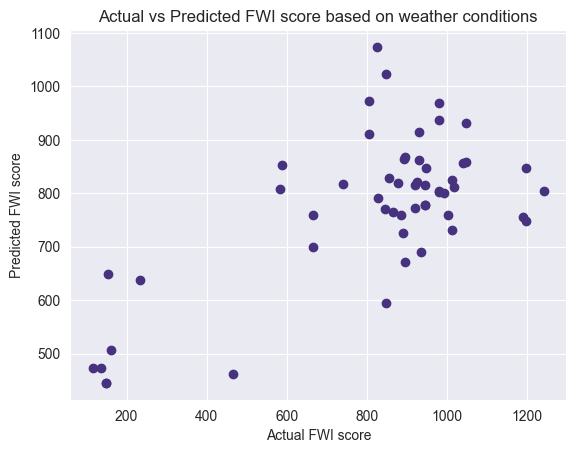

In [86]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual FWI score')
plt.ylabel('Predicted FWI score')
plt.title('Actual vs Predicted FWI score based on weather conditions')

plt.savefig('LMFWIScore.png')
plt.show()

We can conclude that weather conditions hae a large impact on the FWI score. Most notably would be temperature and rain.

## Fire predictions by the month

Logistic regression and gradient boosting classifier was used to predict which month would produce a forest fire

In [87]:
features = ['FFMC', 'DMC', 'DC', 'ISI',  'FWI_score', 'FWI_rank', 'temp', 'RH', 'wind', 'rain', 'area']
X = modelling[features].copy()
y = modelling['month'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy score:', logreg.score(X_test, y_test))

y_prob = logreg.predict_proba(X_test)

max_prob_indices = y_prob.argmax(axis=1)  # Get the indices of the highest probabilities for each sample

predicted_months = logreg.classes_[max_prob_indices]  # Get the corresponding predicted months

predicted_months_counts = pd.Series(predicted_months).value_counts()
print("Predicted month counts:")
print(predicted_months_counts)

Accuracy score: 0.7901234567901234
Predicted month counts:
sep    34
aug    32
jul     4
mar     4
feb     4
oct     2
dec     1
Name: count, dtype: int64


c:\Users\Anis\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
# Create an instance of the gradient boosting classifier
gb_classifier = GradientBoostingClassifier()

features = ['FFMC', 'DMC', 'DC', 'ISI', 'FWI_score', 'FWI_rank', 'temp', 'RH', 'wind', 'rain', 'area']
X = fires[features].copy()
y = fires['month_encoded'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Get the predicted probabilities for each month
y_prob = gb_classifier.predict_proba(X_test)

# Get the predicted indices for the most likely month
most_likely_month_indices = np.argmax(y_prob, axis=1)
month_labels = encoder.classes_

# Get the corresponding predicted months
predicted_months = month_labels[most_likely_month_indices]

# Calculate value counts of predicted months
predicted_month_counts = pd.Series(predicted_months).value_counts()
print("Predicted month counts:")
print(predicted_month_counts)


Accuracy: 0.8765432098765432
Predicted month counts:
aug    33
sep    32
jul     5
feb     4
mar     3
dec     3
jun     1
Name: count, dtype: int64
